In [1]:
#connect Colab to your Google Drive.
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

#import csv file and put it into a Pandas dataframe.
reviews=pd.read_csv('/content/gdrive/My Drive/universal_studio_branches.csv')

print (reviews.iloc[:10,:])

#How many columns and rows?
print ("Shape:", reviews.shape)

#Column names?
print ("Column Names",reviews.columns.values)

          reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   
5             John     1.0  May 28, 2021   
6     annapN7702ZW     2.0  May 27, 2021   
7            Deb P     2.0  May 27, 2021   
8          Chuck N     1.0  May 27, 2021   
9              Jen     4.0  May 26, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   
5                             This is not a vacation   
6                                      Expected More   
7                                  Disapointing.....   
8        Gr

In [ ]:
reviews.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagrid m...   
3  When a person tries the test seat for the ride...   
4  Ok, I can't stress enough to anyone and everyo...   

                      branch  
0  Universal Studios Florida  
1  Universal Studios Florida  
2  Universal Studios Florida  
3  Universal Studios Florida  
4  Universal Studios Florida

In [ ]:
#check how many reviews we have per branch
reviews.branch.value_counts()

Universal Studios Florida      30621
Universal Studios Singapore    15754
Universal Studios Japan         4529
Name: branch, dtype: int64

In [ ]:
#gain more information about the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
reviews.isnull().sum()

reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

In [ ]:
#What values exist within category?
categories = reviews['rating']

labels = list(set(categories))
print('possible categories',labels)


#Check the frequency of each class label.
count=reviews['rating'].value_counts()
print (count)

possible categories [1.0, 2.0, 3.0, 4.0, 5.0]
5.0    28202
4.0    13514
3.0     5229
2.0     1986
1.0     1973
Name: rating, dtype: int64


In [ ]:
#assign reviews with score > 3 as positive sentiment, score  < 3 is negative sentiment
#reviews with score = 3 are dropped because they are neutral
#Categories are literal labels, but it is better for machine learning algorithms just to work with numbers.
#so we will encode them using LabelEncoder, which encode labels with value between 0 and n_classes-1.

#Class LabelEncoder allows to encode labels with values between 0 and n_classes-1.

reviews['label'] = reviews.rating.map({1:0, 2:0, 4:1, 5:1})

#How many columns and rows?
print ("Shape:", reviews.shape)

#Column names?
print ("Column Names",reviews.columns.values)
print (reviews.iloc[:10,:])

Shape: (50904, 7)
Column Names ['reviewer' 'rating' 'written_date' 'title' 'review_text' 'branch' 'label']
          reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   
5             John     1.0  May 28, 2021   
6     annapN7702ZW     2.0  May 27, 2021   
7            Deb P     2.0  May 27, 2021   
8          Chuck N     1.0  May 27, 2021   
9              Jen     4.0  May 26, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   
5                             This is not a vacation   
6               

In [ ]:
#convert rating float to integer
#drop the reviewer, title, written_date, branch columns from the dataframe now for analysis of all branches
reviews['rating'] = reviews['rating'].astype(int)
review = reviews.drop(['reviewer', 'title', 'written_date', 'branch'], axis = 1)
review.head()

rating                                        review_text  label
0       2  We went to Universal over Memorial Day weekend...    0.0
1       1  The food service is horrible. I’m not reviewin...    0.0
2       2  I booked this vacation mainly to ride Hagrid m...    0.0
3       4  When a person tries the test seat for the ride...    1.0
4       5  Ok, I can't stress enough to anyone and everyo...    1.0

In [ ]:
#Check the frequency of each class label.
# we can see the total of positive reviews is significantly higher than negative reviews
count=review['label'].value_counts()
print (count)

1.0    41716
0.0     3959
Name: label, dtype: int64


In [ ]:
#read the dataset after adding sentiment column and removing rating column

random_sample_reviews=review.groupby("label").sample(n=3000, random_state=1)

count=random_sample_reviews['label'].value_counts()
print (count)

#How many columns and rows?
print ("Shape:", random_sample_reviews.shape)

#Column names?
print ("Column Names",random_sample_reviews.columns.values)
print (random_sample_reviews.iloc[:10,:])

0.0    3000
1.0    3000
Name: label, dtype: int64
Shape: (6000, 3)
Column Names ['rating' 'review_text' 'label']
       rating                                        review_text  label
25218       1  Just got back from our trip. Had a hassle gett...    0.0
23478       1  This park was a complete let down. Harry Potte...    0.0
7681        1  We came hear on the 9th November Every year we...    0.0
15582       2  If you are not a fan of stomach dropping rolle...    0.0
34064       1  paying big fee same as hotel room price and wa...    0.0
35186       1  Usually a great place for kids, but during Civ...    0.0
30712       2  Got to get there early before the park open. J...    0.0
19495       1  It was $150.00 plus the cost of a Universal wh...    0.0
29829       2  After visiting Busch Gardens in Tampa and two ...    0.0
37173       2  Went on a ‘non peak’ night, would hate to see ...    0.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_reviews['review_text'], 
                                                    random_sample_reviews['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_reviews.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1500/6000)

Number of rows in the total set: 6000
Number of rows in the training set: 4500
Number of rows in the test set: 1500
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (4500, 176)
Shape of testing set (1500, 176)


In [ ]:
#list the unique vocabulary found in the dataset
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'children': 21, 'really': 119, 'little': 86, 'money': 95, 'spend': 136, 'theme': 141, 'parks': 106, 'expensive': 45, 'great': 65, 'attractions': 10, 'harry': 67, 'potter': 113, 'disney': 36, 'right': 122, 'extra': 50, 'pass': 107, 'fun': 60, 'price': 115, 'harry potter': 68, 'big': 16, 'having': 69, 'things': 144, 'waiting': 163, 'queue': 116, 'enjoy': 40, 'came': 20, 'buy': 19, 'ticket': 147, 'bad': 13, 'small': 135, 'actually': 5, 'walk': 164, '10': 0, 'people': 110, 'worth': 173, 'visit': 158, 'lot': 88, 'make': 92, 'went': 171, 'studios': 139, 'spent': 137, 'didn': 33, 'pay': 109, 'passes': 108, 'early': 38, 'best': 14, 'better': 15, 'universal studios': 155, 'visited': 159, 'orlando': 102, 'times': 149, 'years': 175, 'parking': 105, 'florida': 57, 'think': 145, 'entrance': 42, 'fast': 53, 'cost': 26, 'just': 78, 'way': 170, 'food': 58, 'queues': 117, 'hour': 71, 'wait': 160, 'recommend': 120, 'getting': 61, '15': 1, 'let': 82, 'say': 127, 'come': 25, 'quite': 

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
#measure the overall performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.8246666666666667
Precision score:  0.8353253652058433
Recall score:  0.8190104166666666
F1 score:  0.8270874424720579


In [ ]:
# Precision/Recall/F1-score measures for each element in the test data.
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       732
         1.0       0.84      0.82      0.83       768

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



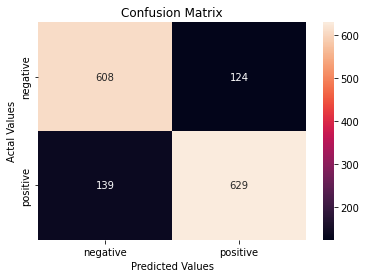

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Breaking down our classifications of the three seperate branches of parks
#Start with Florida Parks
Branch =['Universal Studios Florida']
florida = reviews[reviews.branch.isin(Branch)].copy()

In [ ]:
#How many columns and rows?
print ("Shape:", florida.shape)

Shape: (30621, 7)


In [ ]:
#What values exist within category?
categories = florida['rating']

labels = list(set(categories))
print('possible categories',labels)


#Check the frequency of each class label.
count=florida['rating'].value_counts()
print (count)

possible categories [1, 2, 3, 4, 5]
5    17978
4     6940
3     2960
1     1374
2     1369
Name: rating, dtype: int64


In [ ]:
#assign reviews with score > 3 as positive sentiment, score  < 3 is negative sentiment
#reviews with score = 3 are dropped because they are neutral
#Categories are literal labels, but it is better for machine learning algorithms just to work with numbers.
#so we will encode them using LabelEncoder, which encode labels with value between 0 and n_classes-1.

#Class LabelEncoder allows to encode labels with values between 0 and n_classes-1.

florida['label'] = florida.rating.map({1:0, 2:0, 4:1, 5:1})

#How many columns and rows?
print ("Shape:", florida.shape)

#Column names?
print ("Column Names",florida.columns.values)
print (florida.iloc[:10,:])

Shape: (30621, 7)
Column Names ['reviewer' 'rating' 'written_date' 'title' 'review_text' 'branch' 'label']
          reviewer  rating  written_date  \
0          Kelly B       2  May 30, 2021   
1              Jon       1  May 30, 2021   
2          Nerdy P       2  May 30, 2021   
3        ran101278       4  May 29, 2021   
4  tammies20132015       5  May 28, 2021   
5             John       1  May 28, 2021   
6     annapN7702ZW       2  May 27, 2021   
7            Deb P       2  May 27, 2021   
8          Chuck N       1  May 27, 2021   
9              Jen       4  May 26, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   
5                             This is not a vacation   
6               

In [ ]:
#convert rating float to integer
#drop the reviewer, title, written_date, branch columns from the dataframe now for analysis of all branches
florida['rating'] = florida['rating'].astype(int)
Florida = florida.drop(['reviewer', 'title', 'written_date', 'branch'], axis = 1)
Florida.head()

rating                                        review_text  label
0       2  We went to Universal over Memorial Day weekend...    0.0
1       1  The food service is horrible. I’m not reviewin...    0.0
2       2  I booked this vacation mainly to ride Hagrid m...    0.0
3       4  When a person tries the test seat for the ride...    1.0
4       5  Ok, I can't stress enough to anyone and everyo...    1.0

In [ ]:
#Check the frequency of each class label.
# we can see the total of positive reviews is significantly higher than negative reviews
count=Florida['label'].value_counts()
print (count)

1.0    24918
0.0     2743
Name: label, dtype: int64


In [ ]:
#read the dataset after adding sentiment column and removing rating column

random_sample_florida=Florida.groupby("label").sample(n=2500, random_state=1)

count=random_sample_florida['label'].value_counts()
print (count)

#How many columns and rows?
print ("Shape:", random_sample_florida.shape)

#Column names?
print ("Column Names",random_sample_florida.columns.values)
print (random_sample_florida.iloc[:10,:])

0.0    2500
1.0    2500
Name: label, dtype: int64
Shape: (5000, 3)
Column Names ['rating' 'review_text' 'label']
       rating                                        review_text  label
29691       1  They pack 40,000 people into the park. It was ...    0.0
9690        2  It is not even nearly as good as its Sister Pa...    0.0
3841        1  Do not go at 9 am. Everyone is in a hurry to b...    0.0
16424       2  After several trips that were strictly Disney,...    0.0
2582        1  I've been here for 2 days and every time I wan...    0.0
16756       1  This park might not be good if you are physica...    0.0
8815        1  I had a disappointing visit to your park on We...    0.0
26959       1  At arrival, security inspected the the outside...    0.0
9033        1  We didn't enjoy this park! Way too crowded and...    0.0
28559       2  My family and I were Universally disappointed ...    0.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_florida['review_text'], 
                                                    random_sample_florida['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_florida.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 5000
Number of rows in the training set: 3750
Number of rows in the test set: 1250
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (3750, 184)
Shape of testing set (1250, 184)


In [ ]:
#list the unique vocabulary found in the dataset
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'went': 178, 'days': 34, 'parks': 112, 'spent': 140, 'didn': 40, 'water': 175, 'studios': 143, 'really': 123, 'enjoyed': 49, 'good': 70, 'disney': 43, 'definitely': 36, 'going': 69, 'universal studios': 160, 'lot': 92, 'fun': 67, 'said': 131, 'great': 72, 'thought': 150, 'make': 96, 'trip': 158, 'tickets': 152, 'line': 87, 'll': 90, 'pass': 113, 'lines': 88, 'buy': 21, 'extra': 57, 'worth': 181, '10': 0, 'minutes': 98, 'love': 94, 'fast': 60, 'food': 65, 'wasn': 173, 'visit': 163, 'world': 180, 'right': 127, 'wait': 165, 'passes': 114, 'walk': 169, 'free': 66, 'early': 46, 'stay': 142, 'best': 16, 'nice': 104, '15': 1, 'lots': 93, 'recommend': 124, 'overall': 109, 'experience': 53, 'took': 155, '20': 2, 'year': 182, 'night': 105, 'crowds': 32, 'waiting': 168, 'shows': 136, 'bought': 20, 'express': 54, 'cost': 29, 'waited': 167, 'children': 23, 'better': 17, 'express pass': 55, 'diagon': 37, 'alley': 8, 'cool': 28, 'times': 153, 'diagon alley': 38, 'orlando': 108, '

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
#measure the overall performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.836
Precision score:  0.8546603475513428
Recall score:  0.827217125382263
F1 score:  0.8407148407148407


In [ ]:
# Precision/Recall/F1-score measures for each element in the test data.
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       596
         1.0       0.85      0.83      0.84       654

    accuracy                           0.84      1250
   macro avg       0.84      0.84      0.84      1250
weighted avg       0.84      0.84      0.84      1250



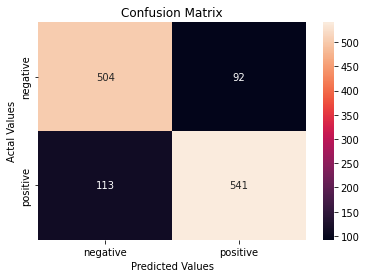

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Now Singapore Parks
Branch =['Universal Studios Singapore']
singapore = reviews[reviews.branch.isin(Branch)].copy()

In [ ]:
#How many columns and rows?
print ("Shape:", singapore.shape)

Shape: (15754, 7)


In [ ]:
#What values exist within category?
categories = singapore['rating']

labels = list(set(categories))
print('possible categories',labels)


#Check the frequency of each class label.
count=singapore['rating'].value_counts()
print (count)

possible categories [1, 2, 3, 4, 5]
5    8148
4    5043
3    1712
2     446
1     405
Name: rating, dtype: int64


In [ ]:
#assign reviews with score > 3 as positive sentiment, score  < 3 is negative sentiment
#reviews with score = 3 are dropped because they are neutral
#Categories are literal labels, but it is better for machine learning algorithms just to work with numbers.
#so we will encode them using LabelEncoder, which encode labels with value between 0 and n_classes-1.

#Class LabelEncoder allows to encode labels with values between 0 and n_classes-1.

singapore['label'] = singapore.rating.map({1:0, 2:0, 4:1, 5:1})

#How many columns and rows?
print ("Shape:", singapore.shape)

#Column names?
print ("Column Names",singapore.columns.values)
print (singapore.iloc[:10,:])

Shape: (15754, 7)
Column Names ['reviewer' 'rating' 'written_date' 'title' 'review_text' 'branch' 'label']
                reviewer  rating    written_date  \
35150                sid       5    May 26, 2021   
35151  Joachim Franzed M       4    May 23, 2021   
35152               Bian       5    May 18, 2021   
35153                CCC       4    May 13, 2021   
35154          Made John       5     May 8, 2021   
35155            joyance       5  April 25, 2021   
35156          DREXPRESS       5  April 25, 2021   
35157        MuhdMikhail       4  April 25, 2021   
35158           Harald F       2  April 12, 2021   
35159                Sam       1   April 9, 2021   

                                                   title  \
35150  If someone wanna have some time away from the ...   
35151                                   Excellent place!   
35152                        Universal Studios Singapore   
35153                                        Great place   
35154               

In [ ]:
#convert rating float to integer
#drop the reviewer, title, written_date, branch columns from the dataframe now for analysis of all branches
singapore['rating'] = singapore['rating'].astype(int)
Singapore = singapore.drop(['reviewer', 'title', 'written_date', 'branch'], axis = 1)
Singapore.head()

rating                                        review_text  label
35150       5  This place is just awesome. All the rides were...    1.0
35151       4  Excellent place when you plan on going vacatio...    1.0
35152       5  Universal Studios Singapore opened in 2010. It...    1.0
35153       4  Overall experience is good but queue still pre...    1.0
35154       5  Good place for family experience,& easy acces ...    1.0

In [ ]:
#Check the frequency of each class label.
# we can see the total of positive reviews is significantly higher than negative reviews
count=Singapore['label'].value_counts()
print (count)

1.0    13191
0.0      851
Name: label, dtype: int64


In [ ]:
#read the dataset after adding sentiment column and removing rating column

random_sample_singapore=Singapore.groupby("label").sample(n=850, random_state=1)

count=random_sample_singapore['label'].value_counts()
print (count)

#How many columns and rows?
print ("Shape:", random_sample_singapore.shape)

#Column names?
print ("Column Names",random_sample_singapore.columns.values)
print (random_sample_singapore.iloc[:10,:])

0.0    850
1.0    850
Name: label, dtype: int64
Shape: (1700, 3)
Column Names ['rating' 'review_text' 'label']
       rating                                        review_text  label
41459       1  Horribly long queue and we could understand th...    0.0
43435       2  My Wife and I visited Universal studios in Oct...    0.0
36303       1  Today I had the worst experience ever in Asia ...    0.0
50387       2  Queues are very long compared to other theme p...    0.0
41562       2  Took my teenage daughter last Saturday for a v...    0.0
37658       2  Enjoyed visit about 5 years ago when it was fa...    0.0
50865       1  Universal Studio Singapore is the worst place ...    0.0
46700       2  Very disappointed. We specially made our trip ...    0.0
50743       2  The food was great - the rides were just ok- t...    0.0
47445       1  If all the rollercoaster rides had been workin...    0.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_singapore['review_text'], 
                                                    random_sample_singapore['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_singapore.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (425/1700)

Number of rows in the total set: 1700
Number of rows in the training set: 1275
Number of rows in the test set: 425
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (1275, 168)
Shape of testing set (425, 168)


In [ ]:
#list the unique vocabulary found in the dataset
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'fun': 55, 'especially': 43, 'love': 82, 'roller': 112, 'coaster': 27, 'definitely': 32, 'recommend': 111, 'roller coaster': 113, 'studio': 127, 'trip': 145, 'old': 94, 'bad': 13, 'experience': 46, 'queue': 106, 'waited': 154, 'hot': 64, 'hours': 66, 'said': 114, 'short': 118, 'know': 72, 'just': 70, '20': 1, 'mins': 86, 'got': 60, '30': 2, 'attractions': 9, 'uss': 149, 'end': 38, 'small': 123, 'wanted': 158, 'need': 92, 'really': 110, 'away': 11, 'like': 74, 'kids': 71, 'come': 29, 'make': 85, 'sure': 130, 'inside': 67, 'universal studio': 147, 'spent': 125, 'took': 141, 'shows': 119, 'having': 63, 'didn': 34, 'food': 53, 'times': 139, 'good': 59, 'went': 163, 'say': 115, 'place': 103, 'don': 36, 'free': 54, 'bring': 21, 'water': 160, 'queues': 107, 'disappointed': 35, 'visit': 151, 'main': 84, 'galactica': 56, 'closed': 26, 'long': 78, 'little': 77, 'adults': 6, 'enjoy': 39, 'young': 167, 'children': 25, 'jurassic': 68, 'way': 162, 'bit': 19, 'pretty': 104, 'tran

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
#measure the overall performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.84
Precision score:  0.86
Recall score:  0.8113207547169812
F1 score:  0.8349514563106797


In [ ]:
# Precision/Recall/F1-score measures for each element in the test data.
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       213
         1.0       0.86      0.81      0.83       212

    accuracy                           0.84       425
   macro avg       0.84      0.84      0.84       425
weighted avg       0.84      0.84      0.84       425



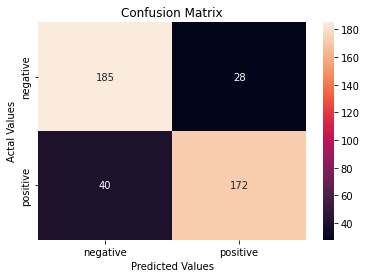

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Lastly, Japan Parks
Branch =['Universal Studios Japan']
japan = reviews[reviews.branch.isin(Branch)].copy()

In [ ]:
#What values exist within category?
categories = japan['rating']

labels = list(set(categories))
print('possible categories',labels)


#Check the frequency of each class label.
count=japan['rating'].value_counts()
print (count)

possible categories [1, 2, 3, 4, 5]
5    2076
4    1531
3     557
1     194
2     171
Name: rating, dtype: int64


In [ ]:
#assign reviews with score > 3 as positive sentiment, score  < 3 is negative sentiment
#reviews with score = 3 are dropped because they are neutral
#Categories are literal labels, but it is better for machine learning algorithms just to work with numbers.
#so we will encode them using LabelEncoder, which encode labels with value between 0 and n_classes-1.

#Class LabelEncoder allows to encode labels with values between 0 and n_classes-1.

japan['label'] = japan.rating.map({1:0, 2:0, 4:1, 5:1})

#How many columns and rows?
print ("Shape:", japan.shape)

#Column names?
print ("Column Names",japan.columns.values)
print (japan.iloc[:10,:])

Shape: (4529, 7)
Column Names ['reviewer' 'rating' 'written_date' 'title' 'review_text' 'branch' 'label']
                reviewer  rating       written_date  \
30621               Star       5       May 27, 2021   
30622         Marcello M       1      April 5, 2021   
30623        mistermark8       5  February 21, 2021   
30624               Thea       5   December 7, 2020   
30625               Lisa       4  November 18, 2020   
30626          jovinnnnn       5  November 18, 2020   
30627  The Eating Ashman       4   November 1, 2020   
30628             Joel S       5   October 24, 2020   
30629              Alfie       4   October 22, 2020   
30630          Mawar M.S       5    October 5, 2020   

                                                   title  \
30621                                        日本你有參考資料同相片   
30622                                              値段が高い   
30623  smaller than the US counterparts, great experi...   
30624                                       Grea

In [ ]:
#convert rating float to integer
#drop the reviewer, title, written_date, branch columns from the dataframe now for analysis of all branches
japan['rating'] = japan['rating'].astype(int)
Japan = japan.drop(['reviewer', 'title', 'written_date', 'branch'], axis = 1)
Japan.head()

rating                                        review_text  label
30621       5  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...    1.0
30622       1  too expensive and nothing special。i had to thr...    0.0
30623       5  Love USJ! There's something they do different ...    1.0
30624       5  We went to USJ without purchasing any tickets ...    1.0
30625       4  I buy the annual pass each year and I wonder w...    1.0

In [ ]:
#Check the frequency of each class label.
# we can see the total of positive reviews is significantly higher than negative reviews
count=Japan['label'].value_counts()
print (count)

1.0    3607
0.0     365
Name: label, dtype: int64


In [ ]:
#read the dataset after adding sentiment column and removing rating column

random_sample_japan=Japan.groupby("label").sample(n=365, random_state=1)

count=random_sample_japan['label'].value_counts()
print (count)

#How many columns and rows?
print ("Shape:", random_sample_japan.shape)

#Column names?
print ("Column Names",random_sample_japan.columns.values)
print (random_sample_japan.iloc[:10,:])

0.0    365
1.0    365
Name: label, dtype: int64
Shape: (730, 3)
Column Names ['rating' 'review_text' 'label']
       rating                                        review_text  label
35010       2  If you've been to a Universal Studios in the s...    0.0
33168       2  If you decide to go during this time, don't.  ...    0.0
32964       2  Really don't waste your time in Japan in this ...    0.0
33044       2  We went there a family of four on a monday in ...    0.0
34555       1  Visited USJ today. Admission is actually reaso...    0.0
34627       2  Was there on 01-10-2014 and the place was just...    0.0
33936       1  Last time I was here was 13 years ago and I th...    0.0
33402       2  I'm sure this would have been better if we did...    0.0
34854       1  This was a disappointment from start to finish...    0.0
30789       1  What an awful decision it is! Almost everythin...    0.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_japan['review_text'], 
                                                    random_sample_japan['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_japan.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (183/730)

Number of rows in the total set: 730
Number of rows in the training set: 547
Number of rows in the test set: 183
0.25068493150684934


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (547, 207)
Shape of testing set (183, 207)


In [ ]:
#list the unique vocabulary found in the dataset
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'say': 148, 'best': 14, 'usj': 184, 'huge': 81, 'little': 98, 'great': 74, 'visit': 186, 'entrance': 50, 'area': 7, 'food': 64, 'came': 21, 'able': 4, 'got': 73, 'tickets': 173, 'pretty': 132, 'wizarding': 202, 'world': 204, 'shows': 150, 'buy': 20, 'actually': 5, 'use': 183, 'make': 104, 'castle': 22, 'experience': 55, 'better': 15, 'rest': 142, 'big': 16, 'attractions': 10, 'queues': 137, 'long': 99, 'definitely': 34, 'worth': 205, 'wait': 188, 'especially': 52, 'hollywood': 77, 'dream': 43, 'visited': 187, 'parks': 123, 'overall': 120, 'super': 164, 'quite': 139, 'don': 42, 'let': 94, 'line': 96, 'recommend': 141, 'going': 71, 'japan': 83, 'wizarding world': 203, 'hollywood dream': 78, 'waste': 197, 'queue': 136, 'entry': 51, 'theme': 166, 'restaurants': 143, 'theme park': 167, 'enjoyed': 48, 'lot': 100, 'fun': 68, 'crazy': 28, 'enjoy': 47, 've': 185, 'managed': 106, 'try': 180, 'price': 133, 'getting': 70, 'website': 200, 'opened': 117, 'having': 75, 'people': 

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
#measure the overall performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.7704918032786885
Precision score:  0.8048780487804879
Recall score:  0.717391304347826
F1 score:  0.7586206896551724


In [ ]:
# Precision/Recall/F1-score measures for each element in the test data.
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        91
         1.0       0.80      0.72      0.76        92

    accuracy                           0.77       183
   macro avg       0.77      0.77      0.77       183
weighted avg       0.77      0.77      0.77       183



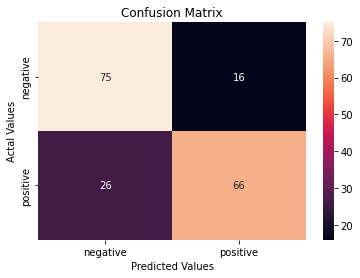

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Additional Analysis

In [3]:
import pandas as pd

universal_reviews=pd.read_csv('/content/gdrive/My Drive/universal_studio_branches.csv')

universal_reviews

reviewer  rating       written_date  \
0                   Kelly B     2.0       May 30, 2021   
1                       Jon     1.0       May 30, 2021   
2                   Nerdy P     2.0       May 30, 2021   
3                 ran101278     4.0       May 29, 2021   
4           tammies20132015     5.0       May 28, 2021   
...                     ...     ...                ...   
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
3                                             My opinion   
4                      The Bourne Stuntacular...MUST SEE   
...                                                  ...   
50899                           I'll Be Back Only If ...   
50900             Universal Studios Singapore Experience   
50901                 Impressive but not quite finished!   
50902                       Small but beautifully marked   
50903                            Excellent Sneak Preview   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  
0        Universal Studios Florida  
1        Universal Studios Florida  
2        Universal Studios Florida  
3        Universal Studios Florida  
4        Universal Studios Florida  
...                            ...  
50899  Universal Studios Singapore  
50900  Universal Studios Singapore  
50901  Universal Studios Singapore  
50902  Universal Studios Singapore  
50903  Universal Studios Singapore  

[50904 rows x 6 columns]

In [4]:
universal_reviews['label'] = universal_reviews.rating.map({1:0, 2:0, 4:1, 5:1})

In [5]:
universal_reviews['rating'] = universal_reviews['rating'].astype(int)
review = universal_reviews.drop(['reviewer', 'title'], axis = 1)
review.head()

rating  written_date                                        review_text  \
0       2  May 30, 2021  We went to Universal over Memorial Day weekend...   
1       1  May 30, 2021  The food service is horrible. I’m not reviewin...   
2       2  May 30, 2021  I booked this vacation mainly to ride Hagrid m...   
3       4  May 29, 2021  When a person tries the test seat for the ride...   
4       5  May 28, 2021  Ok, I can't stress enough to anyone and everyo...   

                      branch  label  
0  Universal Studios Florida    0.0  
1  Universal Studios Florida    0.0  
2  Universal Studios Florida    0.0  
3  Universal Studios Florida    1.0  
4  Universal Studios Florida    1.0

In [6]:
reviews = review.dropna()
reviews

rating       written_date  \
0           2       May 30, 2021   
1           1       May 30, 2021   
2           2       May 30, 2021   
3           4       May 29, 2021   
4           5       May 28, 2021   
...       ...                ...   
50899       4     March 29, 2010   
50900       4     March 29, 2010   
50901       4     March 28, 2010   
50902       4     March 22, 2010   
50903       5  February 24, 2010   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  label  
0        Universal Studios Florida    0.0  
1        Universal Studios Florida    0.0  
2        Universal Studios Florida    0.0  
3        Universal Studios Florida    1.0  
4        Universal Studios Florida    1.0  
...                            ...    ...  
50899  Universal Studios Singapore    1.0  
50900  Universal Studios Singapore    1.0  
50901  Universal Studios Singapore    1.0  
50902  Universal Studios Singapore    1.0  
50903  Universal Studios Singapore    1.0  

[45675 rows x 5 columns]

In [7]:
# Florida datasets
florida_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Florida')]
florida_reviews_fullcovid_dataset = florida_reviews.head(6500)
florida_reviews_postcovid = florida_reviews_fullcovid_dataset.head(500)
florida_reviews_precovid = florida_reviews_fullcovid_dataset.tail(6000)
florida_reviews_postcovid

rating    written_date  \
0         2    May 30, 2021   
1         1    May 30, 2021   
2         2    May 30, 2021   
3         4    May 29, 2021   
4         5    May 28, 2021   
..      ...             ...   
546       1  March 12, 2020   
547       5  March 11, 2020   
548       5  March 11, 2020   
549       5  March 11, 2020   
551       4  March 10, 2020   

                                           review_text  \
0    We went to Universal over Memorial Day weekend...   
1    The food service is horrible. I’m not reviewin...   
2    I booked this vacation mainly to ride Hagrid m...   
3    When a person tries the test seat for the ride...   
4    Ok, I can't stress enough to anyone and everyo...   
..                                                 ...   
546  Worst experience of my life. Rude staff. Long ...   
547  We love Universal. Have visited several times ...   
548  WOW! What an amazing theme park. I was here wi...   
549  Visited Universal Orlando park for 3 days last...   
551  Had not been in 15 years, and took my 8 year o...   

                        branch  label  
0    Universal Studios Florida    0.0  
1    Universal Studios Florida    0.0  
2    Universal Studios Florida    0.0  
3    Universal Studios Florida    1.0  
4    Universal Studios Florida    1.0  
..                         ...    ...  
546  Universal Studios Florida    0.0  
547  Universal Studios Florida    1.0  
548  Universal Studios Florida    1.0  
549  Universal Studios Florida    1.0  
551  Universal Studios Florida    1.0  

[500 rows x 5 columns]

In [8]:
# Singapore datasets
singapore_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Singapore')]
singapore_reviews_fullcovid_dataset = singapore_reviews.head(2900)
singapore_reviews_postcovid = singapore_reviews_fullcovid_dataset.head(113) 
singapore_reviews_precovid = singapore_reviews_fullcovid_dataset.tail(2887)
singapore_reviews_fullcovid_dataset

rating      written_date  \
35150       5      May 26, 2021   
35151       4      May 23, 2021   
35152       5      May 18, 2021   
35153       4      May 13, 2021   
35154       5       May 8, 2021   
...       ...               ...   
38461       5  January 14, 2018   
38462       4  January 14, 2018   
38463       5  January 13, 2018   
38464       5  January 13, 2018   
38465       5  January 13, 2018   

                                             review_text  \
35150  This place is just awesome. All the rides were...   
35151  Excellent place when you plan on going vacatio...   
35152  Universal Studios Singapore opened in 2010. It...   
35153  Overall experience is good but queue still pre...   
35154  Good place for family experience,& easy acces ...   
...                                                  ...   
38461  One day here is NOT ENOUGH. I am a thrill seek...   
38462  My wife and I visited on 9 January 2018, its s...   
38463  You must shed your fixations about realty as s...   
38464  Universal Studios Singapore is a must visit fo...   
38465  It’s not the first time we visited the univers...   

                            branch  label  
35150  Universal Studios Singapore    1.0  
35151  Universal Studios Singapore    1.0  
35152  Universal Studios Singapore    1.0  
35153  Universal Studios Singapore    1.0  
35154  Universal Studios Singapore    1.0  
...                            ...    ...  
38461  Universal Studios Singapore    1.0  
38462  Universal Studios Singapore    1.0  
38463  Universal Studios Singapore    1.0  
38464  Universal Studios Singapore    1.0  
38465  Universal Studios Singapore    1.0  

[2900 rows x 5 columns]

In [9]:
# Japan datasets
japan_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Japan')]
japan_reviews_fullcovid_dataset = japan_reviews.head(1013)
japan_reviews_postcovid = japan_reviews_fullcovid_dataset.head(20)
japan_reviews_precovid = japan_reviews_fullcovid_dataset.tail(993)
japan_reviews_fullcovid_dataset

rating       written_date  \
30621       5       May 27, 2021   
30622       1      April 5, 2021   
30623       5  February 21, 2021   
30624       5   December 7, 2020   
30625       4  November 18, 2020   
...       ...                ...   
31730       5   January 15, 2018   
31731       5   January 15, 2018   
31732       5   January 14, 2018   
31733       4   January 13, 2018   
31734       5   January 13, 2018   

                                             review_text  \
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30622  too expensive and nothing special。i had to thr...   
30623  Love USJ! There's something they do different ...   
30624  We went to USJ without purchasing any tickets ...   
30625  I buy the annual pass each year and I wonder w...   
...                                                  ...   
31730  We arrived early and got in about 15 minutes b...   
31731  Universal studios amazing.. it is a must visit...   
31732  Me & my friend had a great time here. We took ...   
31733  We visited USJ during the holidays (after Chri...   
31734  It's our first time in a Universal Studios (we...   

                        branch  label  
30621  Universal Studios Japan    1.0  
30622  Universal Studios Japan    0.0  
30623  Universal Studios Japan    1.0  
30624  Universal Studios Japan    1.0  
30625  Universal Studios Japan    1.0  
...                        ...    ...  
31730  Universal Studios Japan    1.0  
31731  Universal Studios Japan    1.0  
31732  Universal Studios Japan    1.0  
31733  Universal Studios Japan    1.0  
31734  Universal Studios Japan    1.0  

[1013 rows x 5 columns]

In [10]:
count=singapore_reviews_postcovid['label'].value_counts()
print (count) 


1.0    82
0.0    31
Name: label, dtype: int64


In [11]:
random_sample_florida_reviews_precovid=florida_reviews_precovid.sample(300)
random_sample_florida_reviews_precovid

rating        written_date  \
4881       4     August 13, 2018   
2599       5      April 14, 2019   
1406       5  September 27, 2019   
3671       5    December 3, 2018   
955        5   December 22, 2019   
...      ...                 ...   
5942       5        May 22, 2018   
5839       5        May 31, 2018   
1894       4       July 20, 2019   
2118       5       June 18, 2019   
2352       5        May 13, 2019   

                                            review_text  \
4881  This was my fourth trip to Universal Studios, ...   
2599  Universal studio is one of the finest place to...   
1406  Had a great time in universal , spent the hole...   
3671  The online tickets were easy to find and the l...   
955   The taputapu is actually such a brilliant idea...   
...                                                 ...   
5942  A great ride for the kids but some humour for ...   
5839  Great movie feel to this park as you would exp...   
1894  Visited as part of multi park ticket. Exceptio...   
2118  On our holiday we’ve done the 4 main Disney pa...   
2352  I had a brilliant time here and look forward t...   

                         branch  label  
4881  Universal Studios Florida    1.0  
2599  Universal Studios Florida    1.0  
1406  Universal Studios Florida    1.0  
3671  Universal Studios Florida    1.0  
955   Universal Studios Florida    1.0  
...                         ...    ...  
5942  Universal Studios Florida    1.0  
5839  Universal Studios Florida    1.0  
1894  Universal Studios Florida    1.0  
2118  Universal Studios Florida    1.0  
2352  Universal Studios Florida    1.0  

[300 rows x 5 columns]

In [12]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_florida_reviews_precovid['review_text'], 
                                                    random_sample_florida_reviews_precovid['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_florida_reviews_precovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (75/300)

Number of rows in the total set: 300
Number of rows in the training set: 225
Number of rows in the test set: 75
0.25


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [14]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (225, 174)
Shape of testing set (75, 174)


In [15]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'fun': 67, 'place': 117, 'visit': 154, 'lots': 95, 'busy': 18, 'lot': 94, 'coasters': 23, 'shows': 131, 'really': 123, 'didn': 34, 'wait': 156, 'long': 93, 'line': 90, '30': 2, 'minutes': 100, 'hour': 78, 'recommend': 124, 'family': 57, 'studios': 136, 'end': 41, 'spent': 134, 'days': 29, 'simpsons': 132, 'fast': 59, 'furious': 68, 'minions': 99, 'et': 48, 'adventure': 6, 'old': 108, 'said': 129, 'favorite': 62, 'walk': 160, 'way': 165, 'places': 118, 'make': 98, 'especially': 47, 'movie': 102, 'transformers': 149, 'just': 85, 'hot': 77, 'universal studios': 151, 'fast furious': 60, 'went': 168, 'kids': 86, 'free': 66, 'better': 14, 'bought': 17, 'train': 148, 'things': 141, 'expensive': 51, 'cost': 25, 'week': 167, 'don': 38, 'waited': 158, 'took': 147, 'enjoy': 42, 'best': 13, 'course': 26, 'amazing': 9, 'express': 53, 'pass': 113, 'hours': 79, 'waiting': 159, 'mummy': 103, 'times': 145, 'buy': 19, 'express pass': 54, 'wait times': 157, 'bit': 16, 'love': 96, 'ro

In [16]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.8933333333333333
Precision score:  0.8933333333333333
Recall score:  1.0
F1 score:  0.9436619718309859


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.89      1.00      0.94        67

    accuracy                           0.89        75
   macro avg       0.45      0.50      0.47        75
weighted avg       0.80      0.89      0.84        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


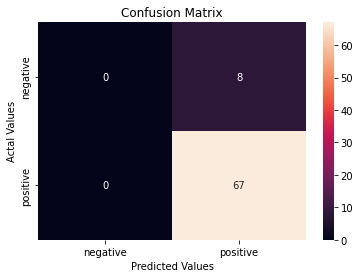

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [28]:
random_sample_florida_reviews_postcovid=florida_reviews_postcovid.sample(300)
random_sample_florida_reviews_postcovid

rating        written_date  \
169       5       March 3, 2021   
236       5     January 6, 2021   
507       2      April 14, 2020   
381       5  September 12, 2020   
474       5       June 25, 2020   
..      ...                 ...   
87        1       April 8, 2021   
145       5      March 20, 2021   
395       5   September 1, 2020   
469       5       June 27, 2020   
98        2       April 5, 2021   

                                           review_text  \
169  We spent full working day in Universal studio....   
236  This was our 3rd visit to Universal in 5 years...   
507  We visited Universal in January. We purchased ...   
381  We came on a holiday before here and it was am...   
474  My partner and I were here a couple of years a...   
..                                                 ...   
87   I am currently on hold with Customer Service i...   
145  This was our first time at Universal and I was...   
395  I never was able to go to universal before, on...   
469  My favorite part of this attraction was how sa...   
98   The park is beautiful, clean, attentive with a...   

                        branch  label  
169  Universal Studios Florida    1.0  
236  Universal Studios Florida    1.0  
507  Universal Studios Florida    0.0  
381  Universal Studios Florida    1.0  
474  Universal Studios Florida    1.0  
..                         ...    ...  
87   Universal Studios Florida    0.0  
145  Universal Studios Florida    1.0  
395  Universal Studios Florida    1.0  
469  Universal Studios Florida    1.0  
98   Universal Studios Florida    0.0  

[300 rows x 5 columns]

In [29]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_florida_reviews_postcovid['review_text'], 
                                                    random_sample_florida_reviews_postcovid['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_florida_reviews_postcovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (75/300)

Number of rows in the total set: 300
Number of rows in the training set: 225
Number of rows in the test set: 75
0.25


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [32]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (225, 219)
Shape of testing set (75, 219)


In [33]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'food': 70, 'service': 156, 'bad': 20, 'restaurants': 144, 'city': 29, 'walk': 201, 'hard': 85, 'good': 76, 'staff': 164, 'harry': 86, 'potter': 139, 'hagrid': 82, 'best': 21, 'coaster': 32, 'lots': 110, 'roller': 148, 'great': 78, 'fast': 64, 'worth': 216, 'city walk': 30, 'harry potter': 87, 'amazing': 10, 'really': 141, 'enjoyed': 56, 'studios': 168, 'having': 88, 'visited': 195, 'years': 218, 'new': 121, 'right': 146, 'diagon': 41, 'alley': 9, 'area': 12, 'little': 105, 'lot': 109, 'different': 45, 'favorite': 66, 'visit': 194, 'crowd': 36, 'experience': 58, 'universal studios': 188, 'diagon alley': 42, 'love': 111, 'social': 160, 'distancing': 49, 'hand': 83, 'sanitizer': 151, 'getting': 74, 'don': 51, 'distance': 48, 've': 192, 'felt': 68, 'safe': 149, 'masks': 116, 'just': 98, 'social distancing': 161, 'hand sanitizer': 84, 'say': 154, 'attraction': 15, 'thought': 176, 'feel': 67, 'week': 211, 'want': 203, 'nice': 122, 'like': 103, 'understand': 187, 'instea

In [34]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.88
Precision score:  0.8653846153846154
Recall score:  0.9574468085106383
F1 score:  0.9090909090909091


In [37]:
random_sample_singapore_reviews_precovid=singapore_reviews_precovid.sample(100)
random_sample_singapore_reviews_precovid

rating       written_date  \
36326       5       May 14, 2019   
35682       4   October 21, 2019   
36298       5       May 22, 2019   
37572       4      July 29, 2018   
38064       4     April 17, 2018   
...       ...                ...   
36659       2  February 23, 2019   
37023       5   December 3, 2018   
38455       4   January 16, 2018   
35718       5   October 11, 2019   
38426       4   January 22, 2018   

                                             review_text  \
36326  I absolutely enjoyed my time at Universal stud...   
35682  Smaller than the typical Universal Studios, it...   
36298  Managed to try all the rides despite the long ...   
37572  Beautifully clean attraction, as is the rest o...   
38064  We really enjoyed the huge Egyptian monuments ...   
...                                                  ...   
36659  Somewhat disappointing...! Having been to the ...   
37023  It was a great place for family! But make sure...   
38455  Despite the space constraints, I must say our ...   
35718  It's an incredible place to visit .. a lil exp...   
38426  No hassle in queueing because we already booke...   

                            branch  label  
36326  Universal Studios Singapore    1.0  
35682  Universal Studios Singapore    1.0  
36298  Universal Studios Singapore    1.0  
37572  Universal Studios Singapore    1.0  
38064  Universal Studios Singapore    1.0  
...                            ...    ...  
36659  Universal Studios Singapore    0.0  
37023  Universal Studios Singapore    1.0  
38455  Universal Studios Singapore    1.0  
35718  Universal Studios Singapore    1.0  
38426  Universal Studios Singapore    1.0  

[100 rows x 5 columns]

In [38]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_singapore_reviews_precovid['review_text'], 
                                                    random_sample_singapore_reviews_precovid['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_singapore_reviews_precovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (25/100)

Number of rows in the total set: 100
Number of rows in the training set: 75
Number of rows in the test set: 25
0.25


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [40]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (75, 162)
Shape of testing set (25, 162)


In [41]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'couple': 24, 'really': 103, 'galactica': 49, 'food': 46, 'good': 51, 'went': 158, 'uss': 145, 'say': 107, 'roller': 106, 'coaster': 21, 'highly': 59, 'friends': 48, 'experience': 40, 'staff': 120, 'friendly': 47, 'best': 12, 'battlestar': 11, 'staff friendly': 121, 'ticket': 135, 'transformers': 141, 'themed': 131, 'express': 41, 'pass': 91, 'buy': 16, 'cost': 23, '30': 3, 'skip': 115, 'queue': 99, 'worth': 160, 'hours': 62, 'waiting': 151, 'holiday': 60, 'price': 98, '50': 4, 'lots': 77, 'water': 155, 'world': 159, 'better': 13, 'theme': 128, 'need': 86, 'jurassic': 64, 'people': 93, 'heat': 58, 'singapore': 113, 'express pass': 42, 'theme park': 129, 'jurassic park': 65, 'kid': 67, 'love': 78, 'little': 73, 'right': 105, 'shows': 111, 'street': 123, 'different': 28, 'characters': 18, 'sure': 127, 'studios': 125, 'twice': 143, 'year': 161, 'half': 56, 'family': 44, 'passes': 92, 'nice': 87, 'things': 132, 'having': 57, 'areas': 8, 'extra': 43, 'adults': 5, 'child

In [42]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.8
Precision score:  0.8
Recall score:  1.0
F1 score:  0.888888888888889


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.80      1.00      0.89        20

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


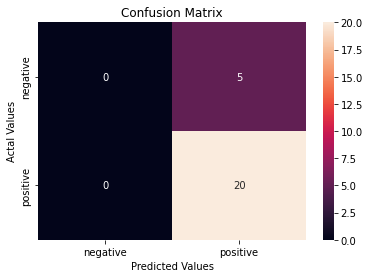

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [46]:
random_sample_singapore_reviews_postcovid=singapore_reviews_postcovid.sample(100)
random_sample_singapore_reviews_postcovid

rating        written_date  \
35160       5       April 5, 2021   
35156       5      April 25, 2021   
35213       5     August 20, 2020   
35194       2   November 27, 2020   
35172       1    January 29, 2021   
...       ...                 ...   
35170       5   February 13, 2021   
35204       4  September 14, 2020   
35167       4   February 24, 2021   
35227       5       July 17, 2020   
35234       5       June 13, 2020   

                                             review_text  \
35160  It was a nice day spent in Universal Studios. ...   
35156  Great place for young and older families Great...   
35213  The tickets are bit expensive as per INR, but ...   
35194  Most restaurants, food courts, drink stands ar...   
35172  Food is terrible. I tried the Pizza place - Lo...   
...                                                  ...   
35170  I visited on 12/2/2021, first day of the Chine...   
35204  Visit Universal every few years and it is alwa...   
35167  The place was not crowded due to crowd control...   
35227  Place is nice, but not as big as Japan or Flor...   
35234  This place looked like little Hollywood when w...   

                            branch  label  
35160  Universal Studios Singapore    1.0  
35156  Universal Studios Singapore    1.0  
35213  Universal Studios Singapore    1.0  
35194  Universal Studios Singapore    0.0  
35172  Universal Studios Singapore    0.0  
...                            ...    ...  
35170  Universal Studios Singapore    1.0  
35204  Universal Studios Singapore    1.0  
35167  Universal Studios Singapore    1.0  
35227  Universal Studios Singapore    1.0  
35234  Universal Studios Singapore    1.0  

[100 rows x 5 columns]

In [48]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_singapore_reviews_postcovid['review_text'], 
                                                    random_sample_singapore_reviews_postcovid['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_singapore_reviews_postcovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (25/100)

Number of rows in the total set: 100
Number of rows in the training set: 75
Number of rows in the test set: 25
0.25


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [50]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (75, 142)
Shape of testing set (25, 142)


In [51]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'love': 65, 'enjoy': 31, 'really': 87, 'fun': 40, 'amazing': 3, 'family': 36, 'hour': 50, 'just': 55, 'tickets': 115, 'enter': 32, 'queue': 83, 'long': 62, 'experience': 35, 'spent': 100, 'queuing': 85, 'inside': 53, 'like': 59, 'little': 61, 'great': 46, 'visit': 128, 'singapore': 97, 'bring': 12, 'characters': 13, 'use': 125, 'don': 28, 'money': 71, '10': 0, 'went': 138, 'universal': 122, 'studios': 106, 'theme': 109, 'park': 80, 'children': 15, 'decided': 23, 'adventure': 2, 'half': 47, 'wait': 132, 'end': 30, 'start': 102, 'staff': 101, 'universal studios': 124, 'theme park': 110, 'booking': 11, 'ticket': 114, 'didn': 26, 'uss': 126, 'lesser': 58, 'number': 76, 'people': 82, 'day': 22, 'queues': 84, 'way': 137, 'come': 17, 'covid': 18, 'attractions': 6, 'manage': 69, 'crowd': 20, 'think': 113, 'lots': 64, 'expensive': 34, 'pass': 81, '19': 1, 'lot': 63, 'waiting': 133, 'distancing': 27, 'good': 42, 'thing': 111, 'covid 19': 19, 'waiting time': 134, 'studio': 10

In [52]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.8
Precision score:  0.7916666666666666
Recall score:  1.0
F1 score:  0.8837209302325582


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29         6
         1.0       0.79      1.00      0.88        19

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



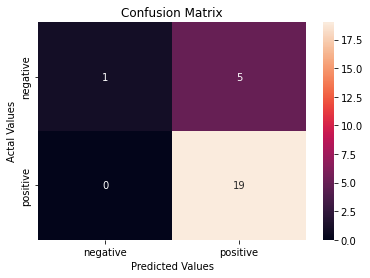

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [56]:
random_sample_japan_reviews_precovid=japan_reviews_precovid.sample(100)
random_sample_japan_reviews_precovid

rating       written_date  \
31507       5       May 19, 2018   
31082       4      March 6, 2019   
30650       5  February 21, 2020   
31451       4      June 18, 2018   
31000       5        May 3, 2019   
...       ...                ...   
31632       5     March 15, 2018   
31523       5        May 8, 2018   
30697       5    January 2, 2020   
30824       4    October 7, 2019   
30658       5  February 10, 2020   

                                             review_text  \
31507  Surprised by my hubby with a trip to Osaka, I ...   
31082  Although we couldn't get Express Pass tickets,...   
30650  Went there on Monday. Booked tickets from the ...   
31451  We went in early June (off season), waited in ...   
31000  Universal Studios Japan is a mix of quirky, fu...   
...                                                  ...   
31632  Spent a day there, too little time and too man...   
31523  Awesome experience!!!! The Harry Potter sectio...   
30697  I've had so much fun there and it's kinda full...   
30824  I really wanted to go to HP World, but online ...   
30658  Having visited a couple other Universal Studio...   

                        branch  label  
31507  Universal Studios Japan    1.0  
31082  Universal Studios Japan    1.0  
30650  Universal Studios Japan    1.0  
31451  Universal Studios Japan    1.0  
31000  Universal Studios Japan    1.0  
...                        ...    ...  
31632  Universal Studios Japan    1.0  
31523  Universal Studios Japan    1.0  
30697  Universal Studios Japan    1.0  
30824  Universal Studios Japan    1.0  
30658  Universal Studios Japan    1.0  

[100 rows x 5 columns]

In [57]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_japan_reviews_precovid['review_text'], 
                                                    random_sample_japan_reviews_precovid['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_japan_reviews_precovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (25/100)

Number of rows in the total set: 100
Number of rows in the training set: 75
Number of rows in the test set: 25
0.25


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [59]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (75, 217)
Shape of testing set (25, 217)


In [60]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'visited': 198, 'usj': 195, 'amazing': 5, 'didn': 39, 'wait': 202, 'long': 103, 'busy': 21, 'especially': 57, 'single': 161, 'rider': 152, 'line': 100, 'easy': 45, 'understand': 192, 'japanese': 90, 'japan': 89, 'couldn': 33, 'thing': 181, 'different': 40, 'entry': 56, 'eat': 46, 'left': 99, 'love': 108, 'single rider': 162, 'wednesday': 209, 'really': 149, 'wanted': 205, 'avoid': 11, 'queues': 146, 'got': 75, 'pass': 136, 'enjoyable': 50, 'did': 38, 'mins': 116, 'waiting': 203, 'normal': 124, 'shows': 158, '10': 1, 'hollywood': 83, 'dream': 43, 'spider': 166, 'man': 112, 'journey': 92, 'minion': 114, 'try': 190, 'flying': 65, 'dinosaur': 41, 'sure': 176, 'express pass': 62, 'hollywood dream': 84, 'spider man': 167, 'flying dinosaur': 66, 'having': 78, 'couple': 34, 'studios': 173, 'bit': 19, 'experience': 61, 'old': 125, 'cool': 32, 'lots': 107, 'buy': 24, 'little': 102, 'compared': 31, 'going': 73, '4d': 3, 'worth': 214, 'lunch': 109, 'best': 15, 'universal studi

In [61]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.88
Precision score:  0.88
Recall score:  1.0
F1 score:  0.9361702127659575


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.88      1.00      0.94        22

    accuracy                           0.88        25
   macro avg       0.44      0.50      0.47        25
weighted avg       0.77      0.88      0.82        25



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


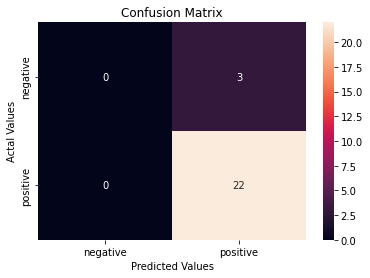

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']  
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [65]:
random_sample_japan_reviews_postcovid=japan_reviews_postcovid.sample(20)
random_sample_japan_reviews_postcovid

rating       written_date  \
30634       5       June 3, 2020   
30621       5       May 27, 2021   
30626       5  November 18, 2020   
30623       5  February 21, 2021   
30639       5     March 17, 2020   
30640       5      March 9, 2020   
30622       1      April 5, 2021   
30635       5       May 28, 2020   
30627       4   November 1, 2020   
30629       4   October 22, 2020   
30630       5    October 5, 2020   
30624       5   December 7, 2020   
30633       4      June 26, 2020   
30625       4  November 18, 2020   
30637       5      April 9, 2020   
30628       5   October 24, 2020   
30636       5        May 6, 2020   
30638       5     March 19, 2020   
30632       5      July 13, 2020   
30631       1     August 5, 2020   

                                             review_text  \
30634  My favorite part of my experience is the Harry...   
30621  日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...   
30626  We bought our tickets through KKday for easy a...   
30623  Love USJ! There's something they do different ...   
30639  The rides where great and the Spiderman ride i...   
30640  Your Osaka trip is not complete if you not com...   
30622  too expensive and nothing special。i had to thr...   
30635  There are various zones such as Harry Poter, M...   
30627  This was for my sons 10th birthday and my wife...   
30629  I liked it here because of the sun at lost her...   
30630  All i have felt was great. Fantastic. So happy...   
30624  We went to USJ without purchasing any tickets ...   
30633  A great day out, lots of unique things you nev...   
30625  I buy the annual pass each year and I wonder w...   
30637  We’re frequent visitors to the Hollywood and O...   
30628  The experience was the best we have had at an ...   
30636  I went there in the late Morning and i spent t...   
30638  I've been to USJ three time with my family alr...   
30632  We live in Kansai and were able to visit in Ju...   
30631  Knowing how incredibly annoying japanese peopl...   

                        branch  label  
30634  Universal Studios Japan    1.0  
30621  Universal Studios Japan    1.0  
30626  Universal Studios Japan    1.0  
30623  Universal Studios Japan    1.0  
30639  Universal Studios Japan    1.0  
30640  Universal Studios Japan    1.0  
30622  Universal Studios Japan    0.0  
30635  Universal Studios Japan    1.0  
30627  Universal Studios Japan    1.0  
30629  Universal Studios Japan    1.0  
30630  Universal Studios Japan    1.0  
30624  Universal Studios Japan    1.0  
30633  Universal Studios Japan    1.0  
30625  Universal Studios Japan    1.0  
30637  Universal Studios Japan    1.0  
30628  Universal Studios Japan    1.0  
30636  Universal Studios Japan    1.0  
30638  Universal Studios Japan    1.0  
30632  Universal Studios Japan    1.0  
30631  Universal Studios Japan    0.0

In [66]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_japan_reviews_postcovid['review_text'], 
                                                    random_sample_japan_reviews_postcovid['label'],
                                                    random_state=0, 
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_japan_reviews_postcovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (5/20)

Number of rows in the total set: 20
Number of rows in the training set: 15
Number of rows in the test set: 5
0.25


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.  
)

In [68]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (15, 708)
Shape of testing set (5, 708)


In [69]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'ve': 652, 'usj': 642, 'family': 187, 'just': 303, 'love': 350, 'place': 445, 'fun': 220, 'favourites': 200, 'jaws': 294, 'waterworld': 678, 'jurassic': 298, 'world': 694, 'terminator': 593, 'spiderman': 564, 'downside': 150, 'course': 109, 'long': 339, 'lines': 331, 'getting': 229, 'fast': 194, 'expensive': 169, 'especially': 167, 'waiting': 665, 'want': 671, 'single': 549, 'day': 116, 'different': 131, 'times': 619, 've usj': 653, 'usj time': 645, 'time family': 615, 'family just': 188, 'just love': 305, 'love place': 351, 'place fun': 446, 'fun favourites': 222, 'favourites harry': 201, 'potter jaws': 456, 'jaws waterworld': 297, 'waterworld jurassic': 679, 'jurassic world': 300, 'world terminator': 698, 'terminator spiderman': 595, 'spiderman downside': 565, 'downside course': 151, 'course long': 110, 'long lines': 342, 'lines getting': 333, 'getting fast': 231, 'fast pass': 195, 'pass expensive': 432, 'expensive especially': 170, 'especially family': 168, 'fam

In [70]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.8
Precision score:  0.8
Recall score:  1.0
F1 score:  0.888888888888889
